# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import scipy.stats as stats
df = pd.read_csv('data/human_body_temperature.csv')

In [37]:
# Your work here.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


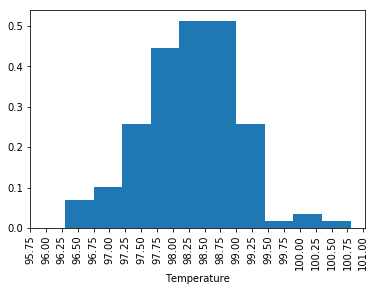

In [38]:
df['temperature']
plt.hist(df['temperature'],density = True)
plt.xlabel('Temperature')
xticks = plt.xticks(np.arange(95.75,101.25,0.25),rotation=90)

In [39]:
p=scipy.stats.normaltest(df['temperature'])
p

NameError: name 'scipy' is not defined

In [40]:
#Question #1:

#P value is greater than 0.05 so the distribution is normal
    

In [41]:
len(df['temperature'])

130

In [42]:
#Question #2:
# Sample size is greater then 30 so it is large enough 
#Samples are collected from different individuals so the observations are independent

In [43]:
#Is the true population mean really 98.6 degrees F?
#First, try a bootstrap hypothesis test
Body_Temp = df['temperature']
BootStrap_Sample = np.random.choice(Body_Temp,size = len(Body_Temp))
Boot_Mean = np.mean(BootStrap_Sample)
Boot_Std = np.std(BootStrap_Sample)
Boot_Median = np.median(BootStrap_Sample)
print("Mean",Boot_Mean,"Std: ",Boot_Std,"Median :",Boot_Median)

Mean 98.24461538461539 Std:  0.7781696016898133 Median : 98.2


In [44]:
def Generate_BootStrap(data,func):
    boot_Samp = np.random.choice(data,size = len(data))
    return func(boot_Samp)


Text(0.5,0,'Temp')

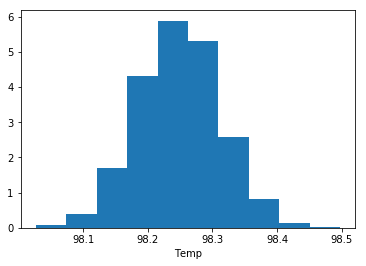

In [45]:
BootArray = np.empty(10000)
for i in range(10000):
    BootArray[i] = Generate_BootStrap(Body_Temp,np.mean)

plt.hist(BootArray,density = True)
plt.xlabel("Temp")

In [46]:
#Confidence Interval
conf_Intv = np.percentile(BootArray,[2.5,97.5])
conf_Intv

array([98.12538462, 98.37307692])

In [47]:
stats.describe(Body_Temp)

DescribeResult(nobs=130, minmax=(96.3, 100.8), mean=98.24923076923075, variance=0.5375575432319616, skewness=-0.004367976879081625, kurtosis=0.7049597854114693)

In [48]:
#Calculate t- value  (t-value= signal/noise)
mean= Body_Temp.mean()
std=Body_Temp.std()
median=Body_Temp.median()
sample_size=Body_Temp.size

signal=mean-98.6
noise=std/(sample_size**0.5)
z_val=signal/noise
z_val

-5.454823292364079

In [49]:
import scipy.stats as stats
P_value=stats.norm.cdf(z_val) * 2 # two sided
P_value

4.90215701411338e-08

In [50]:
#Ho is rejected because the true population mean is not 98.5

In [51]:
#T-test
from scipy import stats
mu = 98.6

tstat, t_pval = stats.ttest_1samp(a= Body_Temp, popmean=mu)
print('The T-Statistic is %d with a p-value of %s' %(abs(tstat),t_pval))

The T-Statistic is 5 with a p-value of 2.4106320415561276e-07


In [52]:
# Z-Test

from statsmodels.stats.weightstats import ztest
z_score, z_pval = ztest(Body_Temp,value=98.6)
print('The Z-Statistic is %d with a p-value of %s' %(abs(z_score),z_pval))

The Z-Statistic is 5 with a p-value of 4.9021570141012155e-08


In [53]:
#Draw a small sample of size 10 from the data and repeat both tests.
np.random.seed(7)
rand = np.random.choice(Body_Temp,size = 10)
tstat, t_pval = stats.ttest_1samp(a= rand, popmean=mu)
z_score, z_pval = ztest(rand,value=98.6)
print('The T-Statistic is %d with a p-value of %s' %(abs(tstat),t_pval))
print('The Z-Statistic is %d with a p-value of %s' %(abs(z_score),z_pval))

The T-Statistic is 1 with a p-value of 0.30930267921950944
The Z-Statistic is 1 with a p-value of 0.2812714328684113


In [54]:
# the correct test for sample size - 10 is t test

In [55]:
#At what temperature should we consider someone's temperature to be "abnormal"?
n= len(Body_Temp)
std_error = np.std(Body_Temp) / np.sqrt(n)
print('The standard error/margin of error is %s' %std_error)
np.percentile(Body_Temp,[2.5,97.5])

The standard error/margin of error is 0.06405661469519336


array([96.7225, 99.4775])

In [56]:
#anything above or below 96.72 to 99.47 degrees F at 95% confidence.



In [57]:
#Is there a significant difference between males and females in normal temperature

#we can again use a t-test as we are comparing the means from two samples
temps_M = df.temperature[df.gender == 'M']
temps_F = df.temperature[df.gender == 'F']

print('Mean body temp of male : ', np.mean(temps_M))
print('Mean body temp of female : ', np.mean(temps_F))

gender_ttest, gender_pval = stats.ttest_ind(a=temps_M, b=temps_F, equal_var=False)
print('The T-Statistic is %d with a p-value of %s' %(abs(gender_ttest), gender_pval))


Mean body temp of male :  98.1046153846154
Mean body temp of female :  98.39384615384613
The T-Statistic is 2 with a p-value of 0.023938264182934196
